<br/>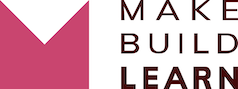<br/><br/>
<center style="color:#888">Visualización de datos</center>
<center style="color:#aaa; margin-top:10px;"><b>Prof. Óscar Fernández Angulo</b><br>oscarfa@faculty.mioti.es</center>
<p style="font-size: 2.5em; text-align:center">Challenge S4: Ajedrez y Homicidios</p><br/>

# Consideraciones previas

* Cada ejercicio se responderá con una sola figura y, si se considera necesario, un texto comentando los resultados.
* No existe una única respuesta correcta. 
* Se valorará positivamente usar diferentes tipos de gráficos durante el Challenge. Si no se repite ninguno, mejor.
* Los ejercicios están pensados para responderse con los conocimientos obtenidos en cualquiera de los Worksheets presentados hasta la fecha.

# Primera parte: Ajedrez

Vamos a comenzar analizando el dataset [Chess Game Dataset (Lichess)](https://www.kaggle.com/datasnaek/chess). En él podemos encontrar la información de partidas de jugadas en lichess.org como el número de turnos, los jugadores y el ganador.

In [1]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import numpy as np
import pandas as pd
import datetime
import math
from scipy import stats
# Seleccionamos un tamaño de letra que se pueda leer.
matplotlib.rcParams.update({'font.size': 14})



In [2]:
# Cargamos el csv en Pandas.
chess_df = pd.read_csv("./chess.csv").reset_index(drop=True)

# Mostramos una muestra.
chess_df.sample(5)

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
19472,h0rjBqbg,True,1.504365e+12,1.504366e+12,56,mate,black,10+0,samoo1477,1751,safadao23,1745,e4 e5 Nf3 d6 d4 Bg4 dxe5 Bxf3 gxf3 Nc6 exd6 Bx...,C41,Philidor Defense,5
2896,foydg28k,True,1.486510e+12,1.486510e+12,115,mate,white,30+0,businessman47,1143,ferdiluis,1191,e4 e5 Bc4 Nf6 d4 d5 dxe5 Nxe4 Qxd5 Qxd5 Bxd5 c...,C24,Bishop's Opening: Ponziani Gambit,5
3485,I9DynYXT,False,1.485390e+12,1.485390e+12,40,mate,black,15+10,whatnext,1356,king5891,1400,e4 b6 d4 Bb7 d5 Nf6 Nc3 e6 e5 Nxd5 Nxd5 Bxd5 B...,B00,Owen Defense,2
15665,TqdAknba,True,1.489340e+12,1.489341e+12,80,outoftime,black,10+0,derspiegel,1741,viktor65,1880,e4 c5 Nf3 Nc6 d4 cxd4 Nxd4 e5 Nf3 Bc5 Nc3 d6 B...,B32,Sicilian Defense: Loewenthal Variation,8
12874,wtDbwtvq,True,1.495837e+12,1.495840e+12,135,mate,white,15+15,timtimtim23,1805,raxis,1721,e4 e5 Nf3 Nc6 Bc4 h6 O-O Nf6 d3 Bc5 Nc3 a6 Be3...,C55,Italian Game: Anti-Fried Liver Defense,6


In [3]:
chess_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              20058 non-null  object 
 1   rated           20058 non-null  bool   
 2   created_at      20058 non-null  float64
 3   last_move_at    20058 non-null  float64
 4   turns           20058 non-null  int64  
 5   victory_status  20058 non-null  object 
 6   winner          20058 non-null  object 
 7   increment_code  20058 non-null  object 
 8   white_id        20058 non-null  object 
 9   white_rating    20058 non-null  int64  
 10  black_id        20058 non-null  object 
 11  black_rating    20058 non-null  int64  
 12  moves           20058 non-null  object 
 13  opening_eco     20058 non-null  object 
 14  opening_name    20058 non-null  object 
 15  opening_ply     20058 non-null  int64  
dtypes: bool(1), float64(2), int64(4), object(9)
memory usage: 2.3+ MB


* No observamos ninguna columna con nulos y las columnas que vamos a necesitar están en el formato adecuado.

## Ejercicio 1

¿En el ajedrez, se nota la ventaja de empezar moviendo?


In [4]:
chess_df['winner'].value_counts()

white    10001
black     9107
draw       950
Name: winner, dtype: int64

49.9%
(10001)
45.4%
(9107)
4.7%
(950)


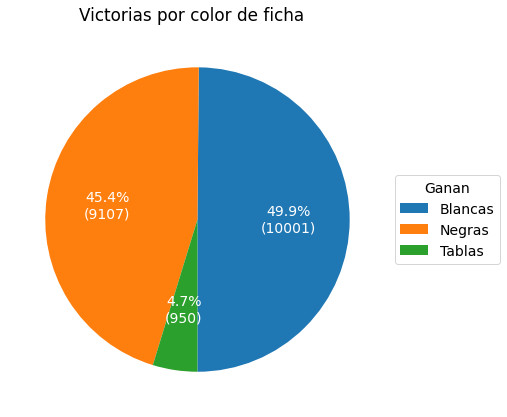

In [11]:
# En ajedrez siempre empiezan las blancas.
# Aún así vamos a ver del data set cuantas partidas ganan blancas y cuantas negras.
# La columna que guarda esa información es winner.

type_chess_name = [
    'Blancas',
    'Negras',
    'Tablas'
]


def func(pct, allvals):
    absolute = int(round(pct/100.*np.sum(allvals)))
    print("{:.1f}%\n({:d})".format(pct, absolute))
    return "{:.1f}%\n({:d})".format(pct, absolute)


fig, ax = plt.subplots(figsize=(7,7),subplot_kw=dict(aspect="equal"))

# Nos quedamos con la columna de los escaños.
winners = chess_df['winner'].value_counts()

# Definimos el orden que queremos en la visualización.
possible_coalitions_order = [0,1,2]

 
# Representamos la distribución de finalización de partidas por color de ficha
wedges, texts, autotexts = ax.pie(
    winners,
    autopct=lambda pct: func(pct, winners),
    startangle=270,
    textprops=dict(color="w")
)

ax.legend(wedges, type_chess_name,
          title="Ganan",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

#plt.setp(autotexts, size=14, weight="bold")
fig.suptitle("Victorias por color de ficha", y=.925);

## Ejercicio 2

¿Cuántas rondas suelen durar las partidas de ajedrez?

In [6]:
def plot_turn_chess(df, bins=25):
    fig, ax = plt.subplots(figsize=(14, 7))
    # Representamos el histograma.
    ax.hist(df['turns'], bins=bins,color='olive')
    ax.set_xticks(bins)
#     ax.set_xticklabels(bins, rotation=35, ha='right')
    
    ax.grid(True, axis='y')

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
 #   ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)

    ax.set_xlabel('Turns')
    ax.set_ylabel('Number of matchs')
    return fig,ax

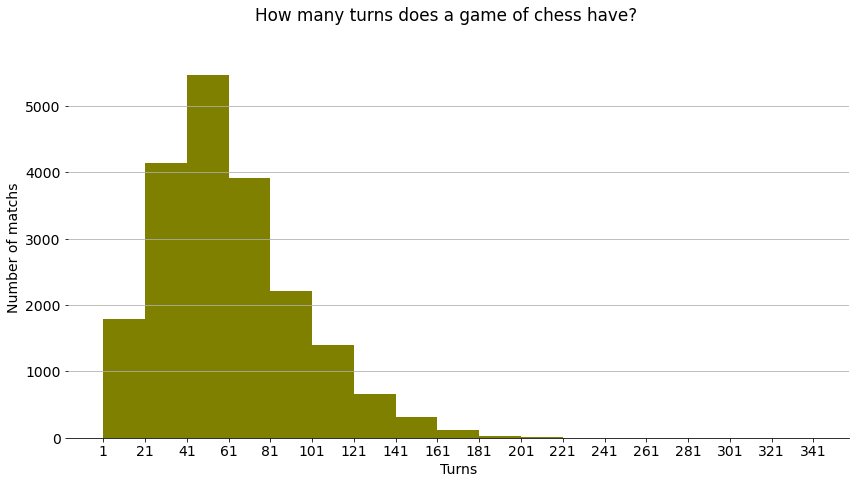

In [7]:
# Entendemos como rondas el número de turnos que ha habido de un jugador a otro.
# La columna que guarda este dato es la columna turns.

# Generamos un histograma al ser una de las formas más adecuada para visualizar como se distribuyen las victorias
# conforme al número de movimientos.
# Establecemos el número de bins conforme a calcular la edad mínima y máxima y la vamos segementado de 5 años en 5 años
# Es configurable, contra más salto se de menos detalle en el histograma

bin_turns=np.arange(int(chess_df['turns'].min()),int(chess_df['turns'].max()),20)
fig,ax=plot_turn_chess(chess_df,bin_turns);

fig.suptitle("How many turns does a game of chess have?");


## Ejercicio 3

¿Cuales son las formas más comunes de terminar las partidas de ajedrez?


In [8]:
def plot_match_chess(df,title=None,x_label=None,y_label=None,legend_label=None):
    
# Obtenemos las columnas a representar.

    color_scale = plt.get_cmap('Dark2')
    
    victory = df['id']
    types = df['victory_status']
    color_list=[]
    for i in range(0,len(types)):
        color_list.append(color_scale(i))
    
      # Instanciamos la figura.
    fig, ax = plt.subplots(figsize=(16, 7))
    
    # Representamos las líneas.
    width = 0.65
    ax.bar(types, victory, width, color=color_list)
    
    ax.set_xticks(types)
    ax.set_xticklabels(types, rotation=35, ha='right')
        
 # Añadimos unas guías verticales.
    ax.grid(True, axis='y')
    
 # Ocultamos el marco.
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
 #  ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    
 # Etiquetamos el eje X.
    ax.set_ylabel('Number of endings')
    ax.set_xlabel('Types of chess game endings')
     
    for index,data in enumerate(victory):
        ax.text(x=index,y=data, s="%d\n"%(data) , ha='center', va='bottom' ,fontdict=dict(fontsize=14))
     
    return fig, ax

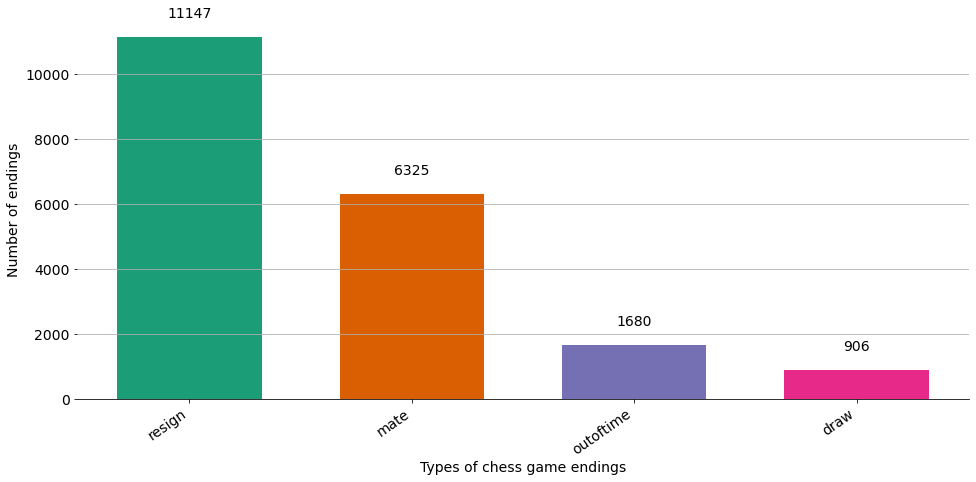

In [9]:
# Las forma de acabar una partida de ajedrez están en la columna victory_status
# Los tipos son:
# resign - rendirse, mate - jaque mate, outoftime - se acaba el tiempo, draw -tablas.

chess_winner_df=chess_df.groupby('victory_status').agg({'id':'count'}).reset_index().sort_values('id',ascending=False)
plot_match_chess(chess_winner_df);

# Segunda parte: Homicidios

Para la segunda parte vamos a emplear el dataset [Homicide Reports, 1980-2014](https://www.kaggle.com/murderaccountability/homicide-reports). Este contiene la información de más de 22000 homicidios cometidos en EEUU. Podemos encontrar información como la raza y el género tanto de la víctima como del asesino.

In [10]:
# Cargamos el csv en Pandas.
homicide_df = pd.read_csv("./homicide.csv")

# Mostramos una muestra.
homicide_df.head(5)

FileNotFoundError: [Errno 2] No such file or directory: './homicide.csv'

* No observamos ninguna columna con nulos. Hay un warnning con la columna 16, **Perpetrator Age**, pero como no es una dato a explotar no realizamos ninguna tarea de preprocesado, y las columnas que vamos a necesitar están en el formato adecuado.

In [ ]:
homicide_df.info()

## Ejercicio 4

Nos gustaría saber cuál es el perfil de las víctimas de los homicidios. Es decir, a qué raza y género pertenecen.


In [ ]:
def muestra_perfil_homicidios(df):
    
    fig, ax = plt.subplots(figsize=(10, 6))

    # Representamos las barras apiladas.
    ax.bar(
        df.index,
        df['Male'],
        label='Male'
    )

    ax.bar(
        df.index,
        df['Female'],
        bottom=df['Male'],
        label='Female'
    )

    ax.bar(
        df.index,
        df['Unknown'],
        bottom=df['Female']+df['Male'],
        label='Unknown'
    )

    ax.set_xticks(df.index)
    ax.set_xticklabels(df.index, rotation=35, ha='right')
    ax.set_ylabel('Percentage (%)')
    ax.set_xlabel('Race')
    fig.suptitle('What is the profile of the homicide victims in U.S.?')

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    # ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.grid(True, axis='y')

    ax.legend(bbox_to_anchor=(1, 1),title='Gender');
    
    return fig,ax

In [ ]:
# Se opta por una gráfica de barras apiladas que nos muestren las proporciones del genero de las vistimas, por cada
# grupo racial registrado. Me parece interesante mostrar también elgrupo racial desconocido y como se distribuye.

homicide_df_pivot= pd.pivot_table(homicide_df,index=['Victim Race'],values='Record ID',columns=['Victim Sex'],aggfunc='count')
homicide_df_pivot['Total']=homicide_df_pivot['Female']+homicide_df_pivot['Male']+homicide_df_pivot['Unknown']
homicide_df_pivot['Female']=(homicide_df_pivot['Female']/homicide_df_pivot['Total'])*100
homicide_df_pivot['Male']=(homicide_df_pivot['Male']/homicide_df_pivot['Total'])*100
homicide_df_pivot['Unknown']=(homicide_df_pivot['Unknown']/homicide_df_pivot['Total'])*100
muestra_perfil_homicidios(homicide_df_pivot);

## Ejercicio 5

Para terminar, querríamos ver el perfil de las víctimas y cómo se relaciona este con el de los asesinos. Es decir, ¿se matan más las mujeres y los hombres entre ellos? ¿son más comunes los asesinatos con géneros cruzados?. Lo mismo con las razas, ¿es más común que los blancos se maten entre ellos?

In [ ]:
from collections import defaultdict 
from scipy import stats, interpolate


def parallel_set(ax, df, set_keys):
    assert len(set_keys) > 1
    
    # Creamos un diccionario con los colores para cada clave.
    color_scale = plt.get_cmap('tab10').colors
    
    color_dict = dict()
    
    color_key = set_keys[0]
    for i, color_class in enumerate(df[color_key].unique()):
        color_dict[color_class]=color_scale[i]
    
    # Añadimos las etiqueras en cada columna.
    set_text(df, ax, set_keys)

    # Creamos las líneas que unen dos columnas.
    for i in range(len(set_keys)-1):
        start_key = set_keys[i]
        end_key = set_keys[i+1]
        
        connect_lines(df, color_key, start_key, end_key, ax, i, i+1, color_dict)

    # Etiquetamos el eje X.
    for i, set_key in enumerate(set_keys):
        ax.text(i, -.095, set_key, ha='center')
        
    # Ocultamos el marco.
    ax.set_xticks([])
    ax.set_yticks([])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)


def set_text(df, ax, set_keys):
    total = df.shape[0]
    x = 0
    # Recorremos las columnas.
    for set_key in set_keys:
        y = 1
        # Recorremos las clases de cada columna.
        for class_name in reversed(df[set_key].unique()):
            # Calculamos el tamaño del grupo.
            count = df[df[set_key]==class_name].shape[0]/total
            # Añadimos un guión al inicio del grupo.
            ax.text(x, y, '-', horizontalalignment='center', verticalalignment='center')
            y -= count/2
            # Añadimos el nombre de la clase en el centro de su proporción.
            ax.text(x, y, class_name, horizontalalignment='center', verticalalignment='center')
            y -= count/2
            # añadimos un quión al final del grupo.
            ax.text(x, y, '-', horizontalalignment='center', verticalalignment='center')
        x+=1

        
def connect_lines(df, color_key, start_line_key, end_line_Key, ax, start_x, end_x, color_dict):
    # Calculamos el número total de filas.
    total_count = df.shape[0]

    # Creamos un diccionario que almacene la posición donde empieza cada clase en la primera columna.
    start_line_classes_start = dict()
    class_start = 1
    for class_name in reversed(df[start_line_key].unique()):
        # Calculamos el tamaño de la proporción.
        class_proportion = df[df[start_line_key]==class_name].shape[0]/total_count
        
        # Lo almacenamos en el diccionario.
        start_line_classes_start[class_name] = class_start
        
        # Actualizamos el acumulado.
        class_start -= class_proportion

    # Repetimos esta operación con los valores de la segunda columna.
    end_line_classes_start = dict()
    class_start = 1
    for class_name in reversed(df[end_line_Key].unique()):
        class_proportion = df[df[end_line_Key]==class_name].shape[0]/total_count

        end_line_classes_start[class_name] = class_start
        class_start -= class_proportion

    # Inicializamos el array X.
    x = np.arange(start_x, end_x + .1, .1)
        
    # Recorremos las clases del color.
    for color_class in reversed(df[color_key].unique()):
        # Filtramos el DataFrame.
        color_filtered_df = df[df[color_key]==color_class]    
        
        # Recorremos las clases de la primera columna.
        for start_line_class in reversed(df[start_line_key].unique()):
            # Filtramos el DataFrame.
            start_line_filtered_df = color_filtered_df[color_filtered_df[start_line_key]==start_line_class]
            
            # Recorremos las clases de la segunda columna.
            for end_line_class in reversed(df[end_line_Key].unique()):
                # Filtramos el DataFrame.
                end_line_filtered_df = start_line_filtered_df[start_line_filtered_df[end_line_Key]==end_line_class]
                
                # Calculamos el tamaño de esta franja.
                count = end_line_filtered_df.shape[0]/total_count
                
                # Si es 0, ignoramos esta iteración.
                if count == 0:
                    continue
                   
                # Interpolamos el inicio de la franja.
                f1 = smooth_line(start_x, end_x, start_line_classes_start[start_line_class], end_line_classes_start[end_line_class])
                
                # Actualizamos los diccionarios con la anchura de la franja.
                start_line_classes_start[start_line_class]-=count
                end_line_classes_start[end_line_class]-=count
                
                # Interpolamos el final de la franja.
                f2 = smooth_line(start_x, end_x, start_line_classes_start[start_line_class], end_line_classes_start[end_line_class])
                
                # Representamos la franja.
                ax.fill_between(x, f1(x), f2(x), alpha=0.6, color=color_dict[color_class])


def smooth_line(x1, x2, y1, y2):
    # Añadimos otro punto a la derecha e izquierda de los originales.
    a = .1
    x = np.array([x1-a, x1, x2, x2+a])
    y = np.array([y1, y1, y2, y2])
    # Interpolamos una línea que une los 4 puntos con una función cuadrática.
    f = interpolate.interp1d(x, y, kind='quadratic')
    return f


In [ ]:
fig, ax = plt.subplots(figsize=(15, 6))

# Filtramos el DataFrame con los valores de interes.
homicide_df = homicide_df[homicide_df['Victim Sex']!='Unknown']
homicide_df = homicide_df[homicide_df['Victim Race']!='Unknown']
homicide_df = homicide_df[homicide_df['Perpetrator Sex']!='Unknown']
homicide_df = homicide_df[homicide_df['Perpetrator Race']!='Unknown']

# Como son multiples variables categoricas que se entrerelacionan entre sí he ensado que el mejor modelo para reperesentar
# es el gráfico de conjunto paralelos.
parallel_set(ax, homicide_df, ['Victim Sex', 'Victim Race','Perpetrator Sex',  'Perpetrator Race'])

fig.suptitle("Relación por sexo y raza entre las victimas y los asesinos de homicidios en USA");